In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from utility import *
import xgboost as xgb

In [2]:
base = "/Users/claxl/Documents/GitHub/MLProject/Data Exploration/EDA/clearData/"

In [7]:
df_train_est_A, df_train_obs_A, df_test_A = readData(base,1)
df_train_est_B, df_train_obs_B, df_test_B = readData(base,2)
df_train_est_C, df_train_obs_C, df_test_C = readData(base,3)

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

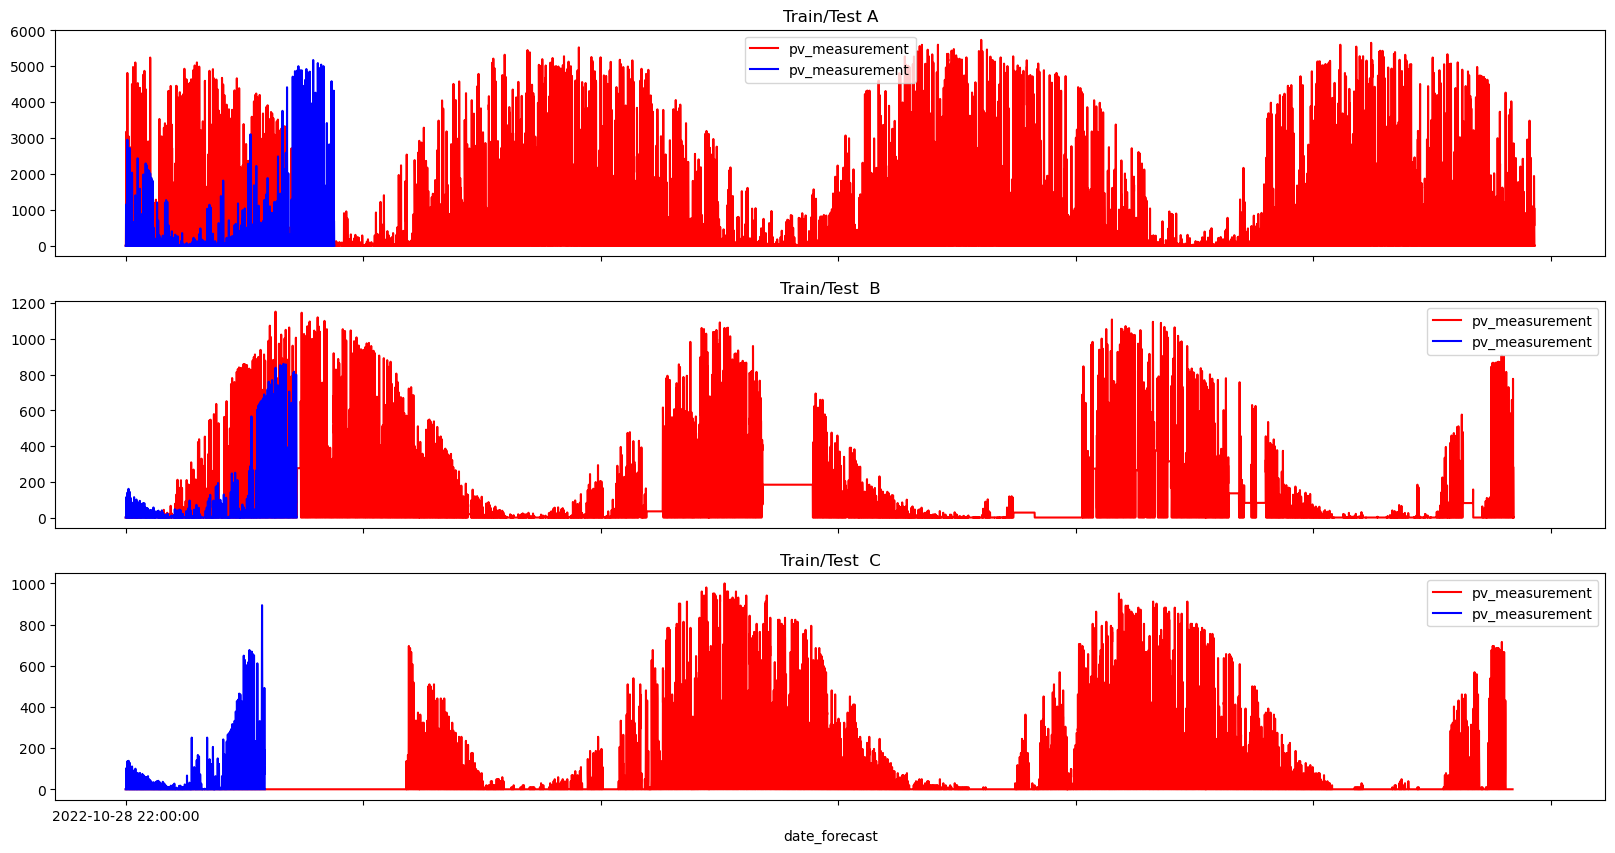

In [8]:
# Plotting a single feature
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'pv_measurement'
df_train_obs_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
df_train_est_A[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')

df_train_obs_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
df_train_est_B[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')

df_train_obs_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
df_train_est_C[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')


In [5]:
df_train_est_A.head(20),df_train_obs_A.head(20)

(          date_forecast  absolute_humidity_2m:gm3  air_density_2m:kgm3  \
 0   2022-10-28 22:00:00                       8.4                1.233   
 1   2022-10-28 23:00:00                       8.2                1.233   
 2   2022-10-29 00:00:00                       8.2                1.230   
 3   2022-10-29 01:00:00                       8.1                1.229   
 4   2022-10-29 02:00:00                       8.3                1.228   
 5   2022-10-29 03:00:00                       8.4                1.225   
 6   2022-10-29 04:00:00                       8.8                1.220   
 7   2022-10-29 05:00:00                       8.7                1.223   
 8   2022-10-29 06:00:00                       8.1                1.230   
 9   2022-10-29 07:00:00                       7.9                1.232   
 10  2022-10-29 08:00:00                       7.6                1.235   
 11  2022-10-29 09:00:00                       7.2                1.238   
 12  2022-10-29 10:00:00 

In [6]:
df_train_est_A['Location'] = 'A'
df_train_obs_A['Location'] = 'A'
df_train_est_B['Location'] = 'B'
df_train_obs_B['Location'] = 'B'
df_train_est_C['Location'] = 'C'
df_train_obs_C['Location'] = 'C'

In [8]:
df_train_est_A['Location'] = df_train_est_A['Location'].astype("category")
df_train_obs_A['Location'] = df_train_obs_A['Location'].astype("category")
df_train_est_B['Location'] = df_train_est_B['Location'].astype("category")
df_train_obs_B['Location'] = df_train_obs_B['Location'].astype("category")
df_train_est_C['Location'] = df_train_est_C['Location'].astype("category")
df_train_obs_C['Location'] = df_train_obs_C['Location'].astype("category")

In [15]:
df_train_est_A.set_index('date_forecast', inplace=True)
df_train_obs_A.set_index('date_forecast', inplace=True)
df_test_A.set_index('date_forecast', inplace=True)

df_train_est_B.set_index('date_forecast', inplace=True)
df_train_obs_B.set_index('date_forecast', inplace=True)
df_test_B.set_index('date_forecast', inplace=True)

df_train_est_C.set_index('date_forecast', inplace=True)
df_train_obs_C.set_index('date_forecast', inplace=True)
df_test_C.set_index('date_forecast', inplace=True)


In [16]:
df_test_C['Location'] = 'C'
df_test_C['Location'].astype("category")

date_forecast
2023-05-01 00:00:00    C
2023-05-01 01:00:00    C
2023-05-01 02:00:00    C
2023-05-01 03:00:00    C
2023-05-01 04:00:00    C
                      ..
2023-07-03 19:00:00    C
2023-07-03 20:00:00    C
2023-07-03 21:00:00    C
2023-07-03 22:00:00    C
2023-07-03 23:00:00    C
Name: Location, Length: 720, dtype: category
Categories (1, object): ['C']

In [26]:
df_train = get_df_train(df_train_est_A,df_train_obs_A)
df_train_B = get_df_train(df_train_est_B,df_train_obs_B)
df_train_C = get_df_train(df_train_est_C,df_train_obs_C)
#df_train = get_df_train(df_train_A,df_train_B)

#df_train = get_df_train(df_train,df_train_C)

df_test = df_test_A
df_train.shape

(34061, 46)

In [31]:
features_name = [c for c in df_train.columns if c != 'pv_measurement']
target = 'pv_measurement'
X = df_train[features_name]
y = df_train[target]
X_test = df_test[features_name]
X.shape,y.shape,X_test.shape

((34061, 45), (34061,), (720, 45))

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, shuffle = False)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((30654, 45), (3407, 45), (30654,), (3407,))

In [32]:
X_train = X
Y_train = y

In [97]:
y.isnull().mean()

0.0

In [35]:
# Calcola il primo e terzo quartile per ciascuna colonna
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)

    # Calcola l'intervallo interquartile (IQR) per ciascuna colonna
IQR = Q3 - Q1

    # Definisci i limiti per identificare gli outlier per ciascuna colonna
limite_inferiore = Q1 - 3 * IQR
limite_superiore = Q3 + 3 * IQR

    # Sostituisci gli outlier con i valori più estremi tra i non-outlier per ciascuna colonna
for colonna in X_train.columns:
    X_train[colonna] = X_train[colonna].apply(lambda x: limite_inferiore[colonna] if x < limite_inferiore[colonna] else (limite_superiore[colonna] if x > limite_superiore[colonna] else x))

C:\Users\claxl\AppData\Local\Temp\ipykernel_25196\838216552.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[colonna] = X_train[colonna].apply(lambda x: limite_inferiore[colonna] if x < limite_inferiore[colonna] else (limite_superiore[colonna] if x > limite_superiore[colonna] else x))


In [36]:
# Calcola il primo e terzo quartile per ciascuna colonna
Q1 = X_test.quantile(0.25)
Q3 = X_test.quantile(0.75)

# Calcola l'intervallo interquartile (IQR) per ciascuna colonna
IQR = Q3 - Q1

# Definisci i limiti per identificare gli outlier per ciascuna colonna
limite_inferiore = Q1 - 3 * IQR
limite_superiore = Q3 + 3 * IQR

# Sostituisci gli outlier con i valori più estremi tra i non-outlier per ciascuna colonna
for colonna in X_test.columns:
    X_test[colonna] = X_test[colonna].apply(lambda x: limite_inferiore[colonna] if x < limite_inferiore[colonna] else (limite_superiore[colonna] if x > limite_superiore[colonna] else x))

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train_v1,columns=X_train.columns,index=X_train.index)
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns,index=X_test.index)
scaled_Y_train = np.log10(Y_train +1)
scaled_X_test.shape

(720, 45)

### 1. Feature importance with Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(scaled_X_train, y_train)
# get importance
importance = rf.feature_importances_

NameError: name 'y_train' is not defined

In [ ]:
dataRF = pd.DataFrame()
dataRF['Feature_name'] = scaled_X_train.columns
dataRF['importance'] = importance
dataRF = dataRF.sort_values(by='importance',ascending = True)
plt.figure(figsize=(20, 25))  # width:20, height:3

plot = plt.barh(dataRF['Feature_name'],dataRF['importance'])
plt.bar_label(plot)
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels


In [ ]:
# Specifica il threshold
threshold = 0.021

# Seleziona le righe in cui il valore nella colonna 'Colonna1' supera il threshold
dataRF = dataRF[dataRF['importance'] > threshold]
dataRF['Feature_name'].tolist()

### 2. Feature importance with XGBRegressor

In [120]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(scaled_X_train, scaled_Y_train)

  # get importance
importance = model.feature_importances_
dataXGB = pd.DataFrame()
dataXGB['Feature_name'] = scaled_X_train.columns
dataXGB['importance'] = importance
dataXGB = dataXGB.sort_values(by='importance',ascending=True)

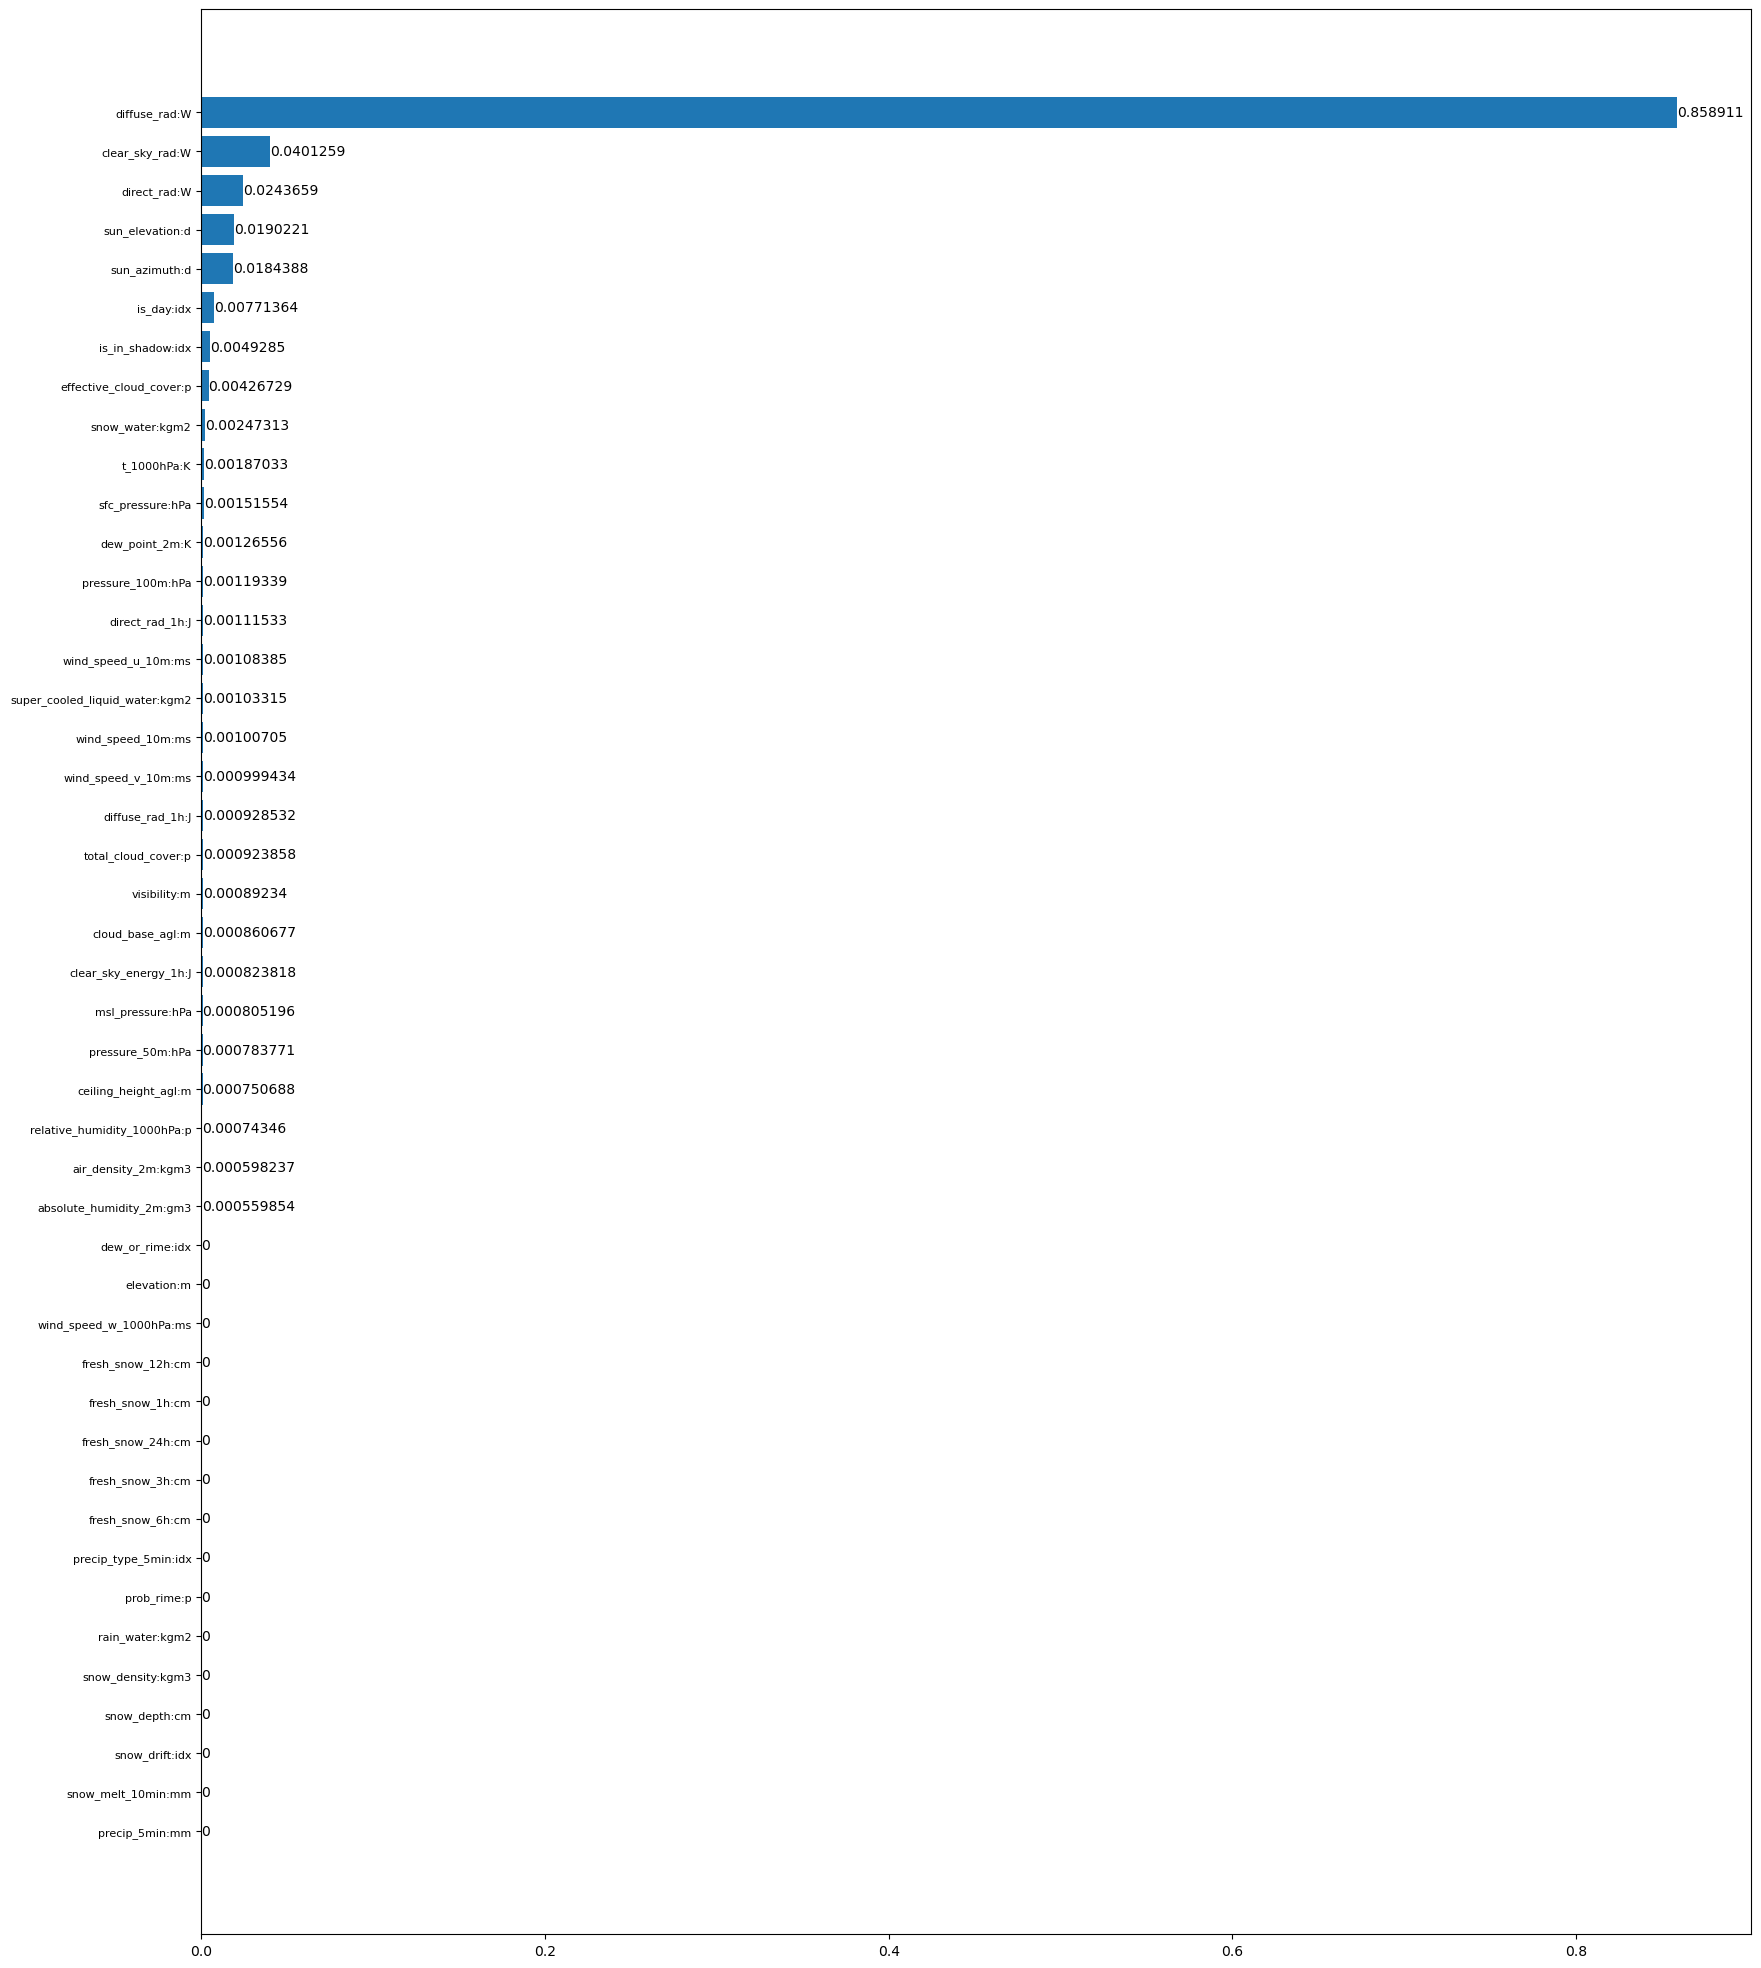

In [121]:

plt.figure(figsize=(20, 25))  # width:20, height:3

plot = plt.barh(dataXGB['Feature_name'],dataXGB['importance'])
plt.bar_label(plot)
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels

In [122]:
# Specifica il threshold
threshold = 0.01

# Seleziona le righe in cui il valore nella colonna 'Colonna1' supera il threshold
dataXGB = dataXGB[dataXGB['importance'] > threshold]

In [130]:
dataXGB['Feature_name'].tolist()

['sun_azimuth:d',
 'sun_elevation:d',
 'direct_rad:W',
 'clear_sky_rad:W',
 'diffuse_rad:W']

### 3. Test predict RandomForest

In [28]:
y_pred_RF = rf.predict(scaled_X_test)
mae = mean_absolute_error(y_test,y_pred_RF)
mae

337.63531845115875

In [40]:
X_test_filter = scaled_X_test[dataRF['Feature_name']]
X_train_filter = scaled_X_train[dataRF['Feature_name']]

In [41]:
rf.fit(X_train_filter,y_train)

RandomForestRegressor(random_state=42)

In [44]:
y_pred_RF = rf.predict(X_test_filter)
mae = mean_absolute_error(y_test,y_pred_RF)
mae

383.7818172777941

### 4. Test predict XGBOOST

In [123]:
X_test_filter = scaled_X_test[dataXGB['Feature_name']]
X_train_filter = scaled_X_train[dataXGB['Feature_name']]

In [38]:
from xgboost import XGBRegressor  
import xgboost as xgb
grid = {'learning_rate': 0.09859585725983404, 'max_depth': 10, 'subsample': 0.779996465158611, 'colsample_bytree': 0.753991757859735, 'min_child_weight': 2}
xgb_model_A = XGBRegressor(**grid)
xgb_model_A.fit(scaled_X_train, scaled_Y_train)
y_pred_xgb = xgb_model_A.predict(scaled_X_test)
#mae = mean_absolute_error(np.log10(Y_test +1), y_pred_xgb)
#print(mae)
#print(len(y_pred_xgb))

ValueError: Found input variables with inconsistent numbers of samples: [3407, 720]

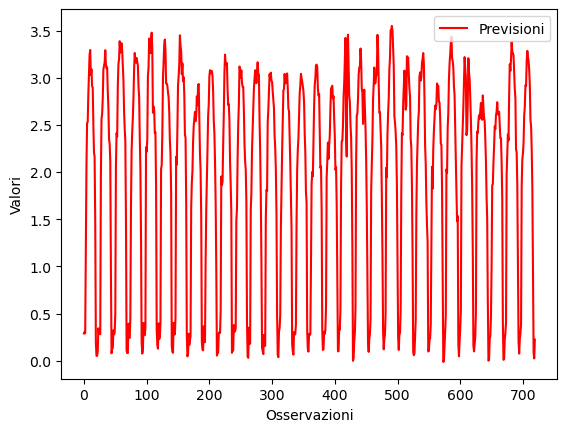

In [39]:
import matplotlib.pyplot as plt

# Creare un grafico a dispersione per mostrare i dati reali
#plt.scatter(range(len(Y_test)), np.log10(Y_test +1), label='Dati reali', color='blue')

# Aggiungere le previsioni al grafico
plt.plot(range(len(y_pred_xgb)), y_pred_xgb, label='Previsioni', color='red')

# Aggiungere etichette e legenda
plt.xlabel('Osservazioni')
plt.ylabel('Valori')
plt.legend()

# Mostrare il grafico
plt.show()

In [93]:
y_pred_b = np.asarray(10 ** y_pred_xgb - 1)

In [107]:
y_pred_c = np.asarray(10 ** y_pred_xgb - 1)

In [78]:
y_pred_a = np.asarray(10 ** y_pred_xgb - 1)

In [108]:
all_preds = y_pred_a.flatten().tolist() + y_pred_b.tolist() + y_pred_c.tolist()
all_preds = [0 if i < 0 else i for i in all_preds]

In [110]:
dict_preds = {'id' : [i for i in range(2160)],  'prediction' : all_preds  } #'time' : hourly_date_range, 'location' : location_list
send_in_df = pd.DataFrame(dict_preds)
send_in_df.set_index('id', inplace=True)
send_in_df.to_csv('xgbhyper.csv')

### 5. ExhaustiveFeatureSelector


In [15]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

# IMPORT MODEL TO EVALUATE WITH FEATURES
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
SEED = 42

models = {
    #'rf': RandomForestRegressor(random_state=SEED,),
   # 'lgbm': LGBMRegressor(),
    'xgb': XGBRegressor(random_state=SEED,),
    #'gb': GradientBoostingRegressor(random_state=SEED,),
    #'cb': CatBoostRegressor(random_state=SEED, silent=True),
    #'ab': AdaBoostRegressor(random_state=SEED,),
}

for key in models:
    print(key)
    model = models[key]
    efs = ExhaustiveFeatureSelector(model,
                                   min_features=3,
                                   max_features=5,
                                   scoring='neg_mean_absolute_error',
                                   cv=5,
                                   print_progress=True
                                   )
    efs = efs.fit(X_train, np.ravel(Y_train))

    selected_features = X_train.columns[list(efs.best_idx_)]
    print(selected_features)
    print(efs.best_score_)

xgb


KeyboardInterrupt: 

In [40]:
y

0         0.00
1         0.00
2         0.00
3         0.00
4        19.36
         ...  
34056     9.02
34057     0.00
34058     0.00
34059     0.00
34060     0.00
Name: pv_measurement, Length: 34061, dtype: float64